In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import log_loss,confusion_matrix,classification_report,roc_curve,auc

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from scipy import sparse
import eli5

In [5]:
#%% Data Loading
tweets = pd.read_excel (r'D:\Dropbox\Collinson\tweets.xlsx')
tweets.dtypes
tweets['TweetBodyLength'] = tweets.TweetBody.str.len()
tweets['TweetHashtagsCount'] = tweets.TweetHashtags.str.count(",") + 1
tweets['TweetRetweetCount'] = tweets['TweetRetweetCount'].astype('int')

col_0,% observations
TweetPostedTime,
Tue Dec 20 00:25:12 +0000 2016,0.000094
Tue Dec 20 00:25:13 +0000 2016,0.000071
Tue Dec 20 00:25:14 +0000 2016,0.000142
Tue Dec 20 00:25:16 +0000 2016,0.000142
Tue Dec 20 00:25:17 +0000 2016,0.000118
...,...
Tue Dec 20 10:56:52 +0000 2016,0.000024
Tue Dec 20 10:56:53 +0000 2016,0.000024
Tue Dec 20 10:56:55 +0000 2016,0.000047


col_0,% observations
TweetBody,
""" Tequila "" \n#vscocam #mextagram #mexicodesconocido #mexicomagico #walk #travel #photo #passion… https://t.co/uZ1pa6fMc2",0.000024
"""#Amsterdam #Canal at 4:30 AM"" #travel #world https://t.co/iDvgwzbh0a",0.000024
"""#Amsterdams Jordaan neighbourhood is #beautiful"" #travel #world https://t.co/ahjeGBUrnu",0.000024
"""#Backpacking #Vietnam: From #Hanoi to Saigon in a month"" #travel #world https://t.co/vj1tuoD5lG",0.000024
"""#Bowman #Lake in Glacier #NationalPark Some #friends and I drove 600 #miles to spend last #weekend there."" #travel… https://t.co/8aFS9KGbbu",0.000024
...,...
🚦🚦🌜🌜♨️♨️ 10 Of The Most AMAZING Abandoned Airports! #travel #sp https://t.co/AsIJG6L8TL,0.000024
🚬🔫🌎💸🐼\n\n#travel #traveling #vacation #visiting #instatravel #instago #instagood #trip #holiday… https://t.co/vKo5JRW9Ru,0.000024
🚶🏾‍♀️🚶🏾‍♀️.@FarEastAdvTravl on #Periscope: Taiwan's #1 University -A Walk Through #travel #taiwan https://t.co/Vi1PoPOt6o,0.000024


col_0,% observations
TweetSource,
"<a href=""http://127.0.0.1/"" rel=""nofollow"">205430a1fe1d8a554b0961bb6aae8c06</a>",0.000802
"<a href=""http://127.0.0.1/"" rel=""nofollow"">EthanApp2323</a>",0.000024
"<a href=""http://127.0.0.1/"" rel=""nofollow"">dillinger_qapp</a>",0.000024
"<a href=""http://127.0.0.3/"" rel=""nofollow"">BastianSalabanziTwitterApp</a>",0.000024
"<a href=""http://127.0.0.8/"" rel=""nofollow"">JamieThomas2015TwitterApp</a>",0.000024
...,...
"<a href=""https://www.twitter.com/JiveLocation"" rel=""nofollow"">JiveLocation</a>",0.000024
"<a href=""https://www.twitter.com/talkbroadband"" rel=""nofollow"">Talk Broadband</a>",0.000024
"<a href=""https://www.weatherarena.com"" rel=""nofollow"">weatherarena</a>",0.000047


col_0,% observations
TweetInReplyToScreenName,
21thunder,0.005291
ABCNetwork,0.005291
AZCardinals,0.005291
AdeldMeyer,0.005291
Airbnb,0.005291
...,...
thEMANacho,0.005291
thatsnotwords,0.005291
themorgantrain,0.021164


col_0,% observations
TweetHashtags,
"100words, party, holiday, work, Lurasidone, Latuda, medication, sleep, art",0.000024
"101reasons, travel",0.000118
"12DaysofGiveaways, trivia, holiday, giveaway",0.000024
"12daysofthickmas, Christmas, holiday, festive, lewd, plump",0.000024
"2017shit, Festivals, music, travel, zhey",0.000024
...,...
"선물, travel, travelgram, traveling, 여행사진, 여행그램, love, 럽",0.000024
"인천, 날시, 예보, korea, incheon, travel",0.000024
"인천, 모도, 모도, 배미꾸미조각공원",0.000024


col_0,% observations
TweetPlaceID,
000524341a618354,0.001
00059b04495a7e37,0.003
000a008c04e2d1a0,0.001
000ab18824ca5b85,0.001
000b5c276f0a0f19,0.001
...,...
faab662cb34cf04f,0.001
facb653464828079,0.001
fb151ef38fa2ac0d,0.001


col_0,% observations
TweetPlaceName,
admin,0.150
city,0.736
country,0.097
neighborhood,0.007
poi,0.010


col_0,% observations
TweetPlaceFullName,
ARIA Resort & Casino,0.001
"Abu Dhabi, United Arab Emirates",0.001
"Acapulco de Juárez, Guerrero",0.002
"Acquedolci, Sicilia",0.001
"Adelaide, South Australia",0.001
...,...
"Ústí nad Labem, Czech Republic",0.001
"İstanbul, Türkiye",0.001
"İzmir, Türkiye",0.001


col_0,% observations
TweetCountry,
Albania,0.001001
Antigua and Barbuda,0.002002
Argentina,0.002002
Australia,0.054054
Austria,0.001001
...,...
United Arab Emirates,0.006006
United Kingdom,0.046046
United States,0.242242


col_0,% observations
TweetPlaceBoundingBox,
"{""type"":""Polygon"",""coordinates"":[[[""-0.104501"",""51.518605""],[""-0.015834"",""51.518605""],[""-0.015834"",""51.5766844""],[""-0.104501"",""51.5766844""]]]}",0.001
"{""type"":""Polygon"",""coordinates"":[[[""-0.1114755"",""51.4194247""],[""-0.0297308"",""51.4194247""],[""-0.0297308"",""51.509947""],[""-0.1114755"",""51.509947""]]]}",0.001
"{""type"":""Polygon"",""coordinates"":[[[""-0.112442"",""51.5068""],[""-0.0733794"",""51.5068""],[""-0.0733794"",""51.522161""],[""-0.112442"",""51.522161""]]]}",0.001
"{""type"":""Polygon"",""coordinates"":[[[""-0.1468348"",""43.0668849""],[""-0.0142079"",""43.0668849""],[""-0.0142079"",""43.1515035""],[""-0.1468348"",""43.1515035""]]]}",0.001
"{""type"":""Polygon"",""coordinates"":[[[""-0.1749828"",""39.8916978""],[""-0.060863"",""39.8916978""],[""-0.060863"",""39.9805156""],[""-0.1749828"",""39.9805156""]]]}",0.001
...,...
"{""type"":""Polygon"",""coordinates"":[[[""98.8617329"",""18.6957815""],[""99.0512219"",""18.6957815""],[""99.0512219"",""18.8782903""],[""98.8617329"",""18.8782903""]]]}",0.003
"{""type"":""Polygon"",""coordinates"":[[[""98.9165022"",""18.7114062""],[""98.9420547"",""18.7114062""],[""98.9420547"",""18.7294136""],[""98.9165022"",""18.7294136""]]]}",0.001
"{""type"":""Polygon"",""coordinates"":[[[""98.940362"",""18.7406115""],[""98.9974603"",""18.7406115""],[""98.9974603"",""18.8428276""],[""98.940362"",""18.8428276""]]]}",0.002


col_0,% observations
UserName,
# Puratchi Thalaivi,0.000024
# ВСЁ СЛОЖНО,0.000024
#27DRUNON,0.000024
#365BLAZE,0.000024
#4Charity Fashion,0.000024
...,...
😺Bindly😺,0.000024
😻깨비_1228😻,0.000024
🙁,0.000024


col_0,% observations
UserScreenName,
00Askold,0.000024
01Micco,0.000024
020photographyS,0.000047
02FNA,0.000071
03grb,0.000118
...,...
zymetejubyva,0.000047
zymyvukosyti,0.000047
zypobykujody,0.000047


col_0,% observations
UserLocation,
"""Live Life On The Edge""",0.000304
#Alabama #Social #Media,0.000038
#Assam #India,0.000038
"#Broome, W.Australia",0.000038
#California #SocialMedia,0.000076
...,...
鹿屋/鹿児島/熊本/天草/兵庫/明石/その辺,0.000038
대한민국,0.000190
대한민국 서울,0.000152


col_0,% observations
UserDescription,
!•£#Jasmine #DarkSkin #CrazyAssAries #TeamCavs #WIU,0.000026
"""..born a slave... nature gave me the heart of a free man...""",0.000026
"""Helping You See The World At Prices You Can Afford"" Comparison Site, Blog, Money Saving Tool. \nWIN A FREE City Break at https://t.co/yJ4xdsnAE7",0.000026
"""Hold me in this wild, wild world.."" | ιиѕтαgяαм: piemeepdomo | =•= | Blog: https://t.co/3RKKMH3Sqc |",0.000026
"""I want to touch the heart of the world and make it smile."" - Charles de Lint",0.000026
...,...
🙄,0.000026
🙌 Just another solo female backpacker who tries to travel around the world. \n📷 @oimeira,0.000132
🙏 Writer | Editor | Blogger 💓 Photography | Wildlife | MMA Fights | Biryani | Kebab | Scotch | Momo 🇮🇳 ♡,0.000026


col_0,% observations
UserLink,
http://LucidLights.com,0.00006
http://gb-lf.com,0.00006
http://instagram.com/fabylizarragag,0.00006
http://janetredlertravelandtourism.com,0.00012
http://t.co/00PVUDbFcA,0.00006
...,...
https://t.co/zwdRLlxyR4,0.00006
https://t.co/zxcrFRF3RN,0.00006
https://t.co/zzvfbZgqZN,0.00012


col_0,% observations
UserExpandedLink,
http://03grb.ru/,0.000302
http://1-robert-eldridge.pixels.com/,0.000543
http://1000goodbyes.com,0.000060
http://103.zp.ua,0.000181
http://12enoono.wixsite.com/edgeslope,0.000060
...,...
https://youtu.be/jQN5rtp59xk,0.000060
https://youtu.be/lDpc_fkFAGo,0.000060
https://youtu.be/nlYbDjwBe2Y,0.000060


col_0,% observations
UserSignupDate,
Fri Apr 01 01:11:18 +0000 2016,0.000024
Fri Apr 01 02:19:33 +0000 2011,0.000024
Fri Apr 01 05:38:50 +0000 2016,0.000024
Fri Apr 01 11:02:17 +0000 2011,0.000024
Fri Apr 01 11:55:16 +0000 2016,0.000024
...,...
Wed Sep 29 03:46:37 +0000 2010,0.000024
Wed Sep 29 15:36:39 +0000 2010,0.000047
Wed Sep 29 17:08:34 +0000 2010,0.000024


col_0,% observations
tweet.place,
"{""id"":""000524341a618354"",""url"":""https://api.twitter.com/1.1/geo/id/000524341a618354.json"",""place_type"":""city"",""name"":""Phang-nga"",""full_name"":""Phang-nga, Thailand"",""country_code"":""TH"",""country"":""Thailand"",""bounding_box"":{""type"":""Polygon"",""coordinates"":[[[""98.5079952"",""8.4291157""],[""98.5410366"",""8.4291157""],[""98.5410366"",""8.4783013""],[""98.5079952"",""8.4783013""]]]}}",0.001
"{""id"":""00059b04495a7e37"",""url"":""https://api.twitter.com/1.1/geo/id/00059b04495a7e37.json"",""place_type"":""admin"",""name"":""Guangdong"",""full_name"":""Guangdong, People's Republic of China"",""country_code"":""CN"",""country"":""People's Republic of China"",""bounding_box"":{""type"":""Polygon"",""coordinates"":[[[""109.664659"",""20.221264""],[""117.17479"",""20.221264""],[""117.17479"",""25.518608""],[""109.664659"",""25.518608""]]]}}",0.003
"{""id"":""000a008c04e2d1a0"",""url"":""https://api.twitter.com/1.1/geo/id/000a008c04e2d1a0.json"",""place_type"":""admin"",""name"":""Da Nang"",""full_name"":""Da Nang, Vietnam"",""country_code"":""VN"",""country"":""Vietnam"",""bounding_box"":{""type"":""Polygon"",""coordinates"":[[[""107.816619"",""15.918397""],[""108.338513"",""15.918397""],[""108.338513"",""16.215716""],[""107.816619"",""16.215716""]]]}}",0.001
"{""id"":""000ab18824ca5b85"",""url"":""https://api.twitter.com/1.1/geo/id/000ab18824ca5b85.json"",""place_type"":""city"",""name"":""Pa Tong"",""full_name"":""Pa Tong, Thailand"",""country_code"":""TH"",""country"":""Thailand"",""bounding_box"":{""type"":""Polygon"",""coordinates"":[[[""98.2845397"",""7.8756968""],[""98.3126184"",""7.8756968""],[""98.3126184"",""7.9178847""],[""98.2845397"",""7.9178847""]]]}}",0.001
"{""id"":""000b5c276f0a0f19"",""url"":""https://api.twitter.com/1.1/geo/id/000b5c276f0a0f19.json"",""place_type"":""city"",""name"":""Woollamia"",""full_name"":""Woollamia, New South Wales"",""country_code"":""AU"",""country"":""Australia"",""bounding_box"":{""type"":""Polygon"",""coordinates"":[[[""150.631910016"",""-35.028498002""],[""150.672207008"",""-35.028498002""],[""150.672207008"",""-35.004848009""],[""150.631910016"",""-35.004848009""]]]}}",0.001
...,...
"{""id"":""faab662cb34cf04f"",""url"":""https://api.twitter.com/1.1/geo/id/faab662cb34cf04f.json"",""place_type"":""city"",""name"":""Suginami-ku"",""full_name"":""Suginami-ku, Tokyo"",""country_code"":""JP"",""country"":""Japan"",""bounding_box"":{""type"":""Polygon"",""coordinates"":[[[""139.585064"",""35.665879""],[""139.667527"",""35.665879""],[""139.667527"",""35.730446""],[""139.585064"",""35.730446""]]]}}",0.001
"{""id"":""facb653464828079"",""url"":""https://api.twitter.com/1.1/geo/id/facb653464828079.json"",""place_type"":""city"",""name"":""Peabody"",""full_name"":""Peabody, MA"",""country_code"":""US"",""country"":""United States"",""bounding_box"":{""type"":""Polygon"",""coordinates"":[[[""-71.034586"",""42.494855""],[""-70.912696"",""42.494855""],[""-70.912696"",""42.570296""],[""-71.034586"",""42.570296""]]]}}",0.001
"{""id"":""fb151ef38fa2ac0d"",""url"":""https://api.twitter.com/1.1/geo/id/fb151ef38fa2ac0d.json"",""place_type"":""country"",""name"":""Republic of the Philippines"",""full_name"":""Republic of the Philippines"",""country_code"":""PH"",""country"":""Republic of the Philippines"",""bounding_box"":{""type"":""Polygon"",""coordinates"":[[[""116.8748754"",""4.4073918""],[""126.7814024"",""4.4073918""],[""126.7814024"",""21.1879257""],[""116.8748754"",""21.1879257""]]]}}",0.001


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000269E722C208>,
      dtype=object)

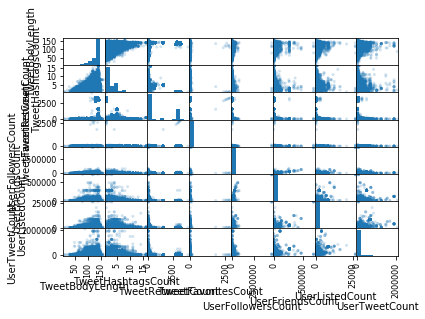

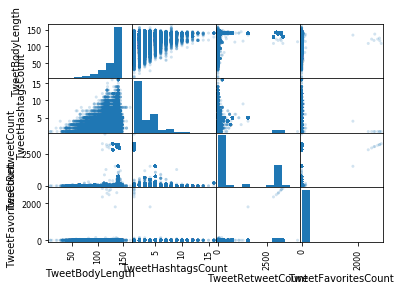

In [6]:
# Data Exploratory

for column in tweets.select_dtypes(include=["object"]).columns:
    display(pd.crosstab(index=tweets[column], columns="% observations", normalize="columns"))
pd.plotting.scatter_matrix(tweets[['TweetBodyLength', 'TweetHashtagsCount', 'TweetRetweetCount', 'TweetFavoritesCount', 'UserFollowersCount', 'UserFriendsCount', 'UserListedCount', 'UserTweetCount']], alpha=0.2)
pd.plotting.scatter_matrix(tweets[['TweetBodyLength', 'TweetHashtagsCount', 'TweetRetweetCount', 'TweetFavoritesCount']], alpha=0.2)

#ax = tweets['TweetRetweetCount'].plot.hist(bins=12, alpha=0.5)

## Quick df facts
#df_size = tweets.count()
##num_unique_tweets = tweets.TweetID.value_counts()
#num_unique_tweets = tweets.TweetID.nunique()
#num_unique_users = tweets.UserID.nunique()
#num_unique_users_reteweeted = tweets.TweetRetweetFlag.value_counts()
#user_tweet_count_df = tweets.groupby("UserID").nunique()

In [7]:
#%% By binning the data, a regression problem was converted into a classification problem which is easier to deal with when working with predictions
bins_cut = [0, 1, 3, 10, 100, 1000,5000]
labels_cut = [1,2,3,4,5,6]

tweets['TweetRetweetBin'] = pd.cut(tweets['TweetRetweetCount'], bins=bins_cut, labels=labels_cut )
tweets['TweetRetweetBin'] = tweets['TweetRetweetBin'].cat.add_categories(0).fillna(0)
tweets['TweetRetweetBin'].cat.categories = [0,1,2,3,4,5,6]

In [8]:
#%%
training_data, testing_data = train_test_split(tweets,random_state = 2000)
text_transformer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), lowercase=True, max_features=150000)

X_train_text = text_transformer.fit_transform(training_data['TweetBody'])
X_test_text = text_transformer.transform(testing_data['TweetBody'])

X_train_text.shape, X_test_text.shape


logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial', random_state=17, n_jobs=4)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [9]:
cv_results = cross_val_score(logit, X_train_text, training_data['TweetRetweetBin'], cv=skf, scoring='f1_micro')
cv_results, cv_results.mean()

(array([0.9089193 , 0.90560101, 0.90574351, 0.91203777, 0.91500079]),
 0.9094604740193241)

In [10]:
logit.fit(X_train_text, training_data['TweetRetweetBin'])

LogisticRegression(C=50.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=4, penalty='l2',
                   random_state=17, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
eli5.show_weights(estimator=logit, 
                  feature_names= list(text_transformer.get_feature_names()),
                 top=(50, 5))

In [17]:
# Test Data
test_preds = logit.predict(X_test_text)
pd.DataFrame(test_preds, columns=['TweetRetweetBin'])

,TweetRetweetBin
0,4
1,6
2,6
3,5
4,5
...,...
10587,6
10588,6
10589,6
10590,6


In [18]:
# Measure of Performance
test_result = testing_data['TweetRetweetBin'].reset_index()
test_result['Result'] = pd.DataFrame(test_preds, columns=['TweetRetweetBin'])

In [19]:
print('\nConfusion matrix\n',confusion_matrix(test_result['TweetRetweetBin'],test_result['Result']))



Confusion matrix
 [[ 364   56   33   22    1    0  260]
 [  33  333   19   17    0    0   61]
 [  32   27  420   18    1    0   35]
 [  20   11   20  852    1    0    7]
 [   7    2    3    4  724    0    0]
 [   0    0    0    0    1 3717    0]
 [  63   29    5   11    0    0 3383]]


In [22]:
print(classification_report(test_result['TweetRetweetBin'],test_result['Result']))

              precision    recall  f1-score   support

           0       0.70      0.49      0.58       736
           1       0.73      0.72      0.72       463
           2       0.84      0.79      0.81       533
           3       0.92      0.94      0.93       911
           4       0.99      0.98      0.99       740
           5       1.00      1.00      1.00      3718
           6       0.90      0.97      0.93      3491

    accuracy                           0.92     10592
   macro avg       0.87      0.84      0.85     10592
weighted avg       0.92      0.92      0.92     10592

